<a href="https://colab.research.google.com/github/HamsalekhaP/EVA/blob/master/Assignment_3_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# Keras is a is a deep-learning framework that sits atop TensorFlow and Theano and the user friendly, modular APIs allow for easy and fast prototyping of deep learning models
# https://keras.io/

# Keras installation is done via PIP which is a Python package manager and imported to build  DNN model
!pip install -q keras
import keras

In [0]:
# numpy is a fundamental packaging for scientific computing in Python.It provides a high-performance multidimensional array object and tools for working with these arrays.These are needed for dataset storage and manipulation
import numpy as np

# import all the methods made available by keras to build a model.
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Conv2D, MaxPooling2D, SeparableConv2D

# importing numpy utilities provided by keras
from keras.utils import np_utils

# import the MNIST dataset.MNIST is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

(60000, 28, 28)


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

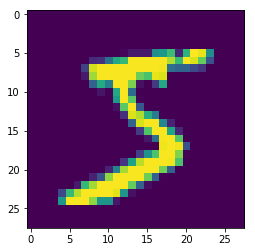

In [136]:
# two tuples are returned.
# 1. X_train, X_test: unsigned 8 bit integer array of grayscale image data with shape (num_of_samples, 28, 28).
# 2. y_train, y_test: unsigned 8 bit integer array of digit labels (integers in range 0-9) with shape (num_of_samples,).
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 60000 images of 28 x 28 dimension 
print (X_train.shape)

# matplotlib is a  Python 2D plotting library to generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc.
# pyplot module is used for simple plotting
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

# reshape the dataset into 28x28x1 array format to facilitate convolution
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

# array values which are originally unsigned 8 bit integers is changed to 32 bit float type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the values to ease calculation during convolution. 255 is used as X_train and X_test originally have values ranging from 0 to 255.(unsigned 8 bit) 
X_train /= 255
X_test /= 255
y_train[:10]


# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Y_train[:10]




In [137]:
from keras.layers import Activation

# The Sequential model is a linear stack of layers. You can create a Sequential model by passing a list of layer instances to the constructor or adding layers via the add() method
model = Sequential()

## 31k
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(10, (1, 1), activation='relu'))
# model.add(Conv2D(12, 10))
# model.add(Flatten())
# model.add(Activation('softmax'))

##19k 98.75%
# model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28,28,1)))
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(10, 1, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Conv2D(10,12))
# model.add(Flatten())
# model.add(Activation('softmax'))

# # 18k 99.07%
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(10, 1, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(10,11))
model.add(Flatten())
model.add(Activation('softmax'))

# # 21k 98.91%
# model.add(Conv2D(10, (3, 3), activation='relu', input_shape=(28,28,1)))
# model.add(Conv2D(20, (3, 3), activation='relu'))
# model.add(Conv2D(40, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(10, 1, activation='relu'))
# model.add(Conv2D(10,11))
# model.add(Flatten())
# model.add(Activation('softmax'))


##20k 98..71%
# model.add(Conv2D(18, (3, 3), activation='relu', input_shape=(28,28,1)))
# model.add(Conv2D(36, (3, 3), activation='relu'))
# # model.add(Conv2D(40, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(10, 1, activation='relu'))
# model.add(Conv2D(10,12))
# model.add(Flatten())
# model.add(Activation('softmax'))

## 16k 98.9%
# model.add(Conv2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
# model.add(Conv2D(16, 3, 3, activation='relu'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(32, 3, 3, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Conv2D(10, 1, activation='relu'))
# model.add(Conv2D(10, 10))
# model.add(Flatten())
# model.add(Activation('softmax'))

# model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
# model.add(Convolution2D(10, 1, activation='relu'))
# model.add(Convolution2D(10, 26))
# model.add(Flatten())
# model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_174 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_175 (Conv2D)          (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_176 (Conv2D)          (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_177 (Conv2D)          (None, 11, 11, 10)        330       
_________________________________________________________________
dropout_9 (Dropout)          (None, 11, 11, 10)        0         
_________________________________________________________________
conv2d_178 (Conv2D)          (None, 1, 1, 10)          12110     
__________

In [138]:
# Ccompile method configures the model for training and sets the optimiser, loss function etc.
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# fit method trains the model for a given number of epochs (iterations on a dataset) with the set batch size.
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
# evaluate model returns the loss value & metrics values for the model with test data.
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/10
60000/60000 [==============================] - 12s 205us/step - loss: 0.2694 - acc: 0.9161
Epoch 2/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.1093 - acc: 0.9669
Epoch 3/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.0832 - acc: 0.9745
Epoch 4/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.0698 - acc: 0.9792
Epoch 5/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.0648 - acc: 0.9796
Epoch 6/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.0568 - acc: 0.9822
Epoch 7/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.0543 - acc: 0.9831
Epoch 8/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.0500 - acc: 0.9841
Epoch 9/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.0496 - acc: 0.9845
Epoch 10/10
60000/60000 [==============================] - 10s 164us/step - loss: 

In [0]:
# predict method generates output predictions for the input samples.
y_pred = model.predict(X_test)


In [140]:
print(y_pred[:9])
print(y_test[:9])

[[1.2968475e-08 1.1367185e-09 2.9106187e-07 3.8145051e-06 3.6520457e-11
  2.1841631e-10 1.3777654e-14 9.9999547e-01 3.7260993e-08 2.9118542e-07]
 [1.3830877e-06 4.8028945e-05 9.9991393e-01 2.3279695e-07 1.0475962e-09
  4.4463707e-11 3.5476049e-05 1.6768182e-09 8.7295734e-07 4.0908402e-11]
 [1.8506251e-08 9.9990022e-01 1.3245852e-06 5.7410695e-08 6.1190622e-05
  7.8797814e-07 6.0684806e-06 1.1996221e-05 1.8132107e-05 5.5143335e-08]
 [9.9950576e-01 8.3942499e-13 7.4475759e-07 1.2161492e-08 4.9039055e-08
  1.1163335e-06 4.7805271e-04 2.6692756e-08 2.1534211e-06 1.2121136e-05]
 [3.2036937e-08 1.7317713e-11 2.1399650e-08 2.2812134e-10 9.9995220e-01
  8.6831141e-12 5.7780127e-09 2.7838777e-07 1.0710285e-06 4.6475132e-05]
 [2.1586418e-08 9.9988341e-01 1.1833753e-06 9.2713908e-09 7.0120826e-05
  5.1195261e-08 3.9086746e-07 3.1751762e-05 1.2881687e-05 1.8804691e-07]
 [7.9588870e-12 3.8963140e-08 1.0755067e-08 1.2198571e-09 9.9895167e-01
  1.1403756e-07 9.1737279e-10 2.5463095e-07 1.0294025e-03 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

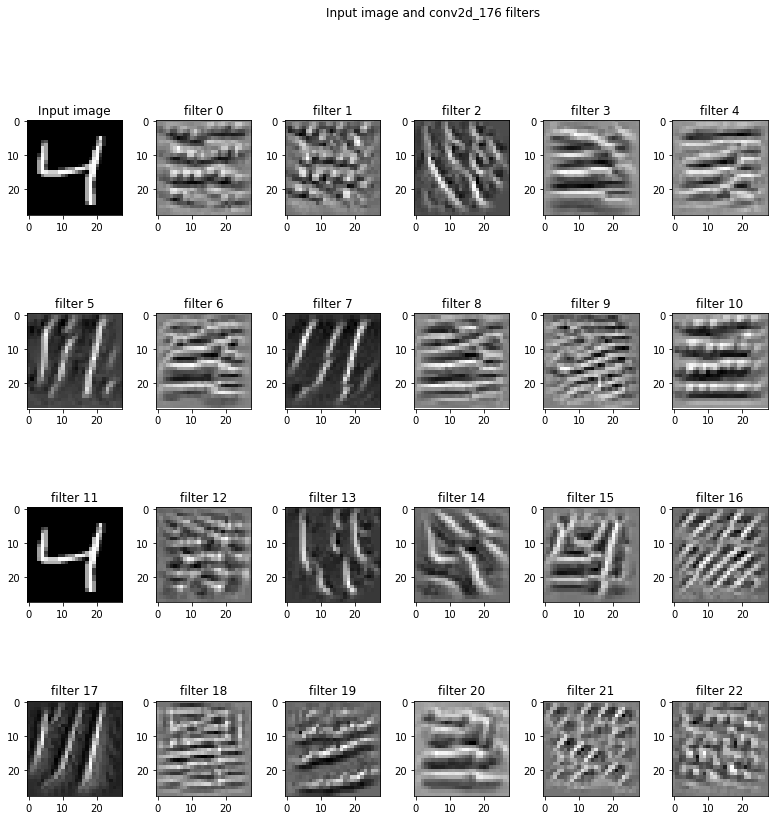

In [144]:
# Filter visualization of the 3rd laayer of the model

import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_176'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()